In [134]:
import pandas as pd
import random
from datetime import datetime, timedelta
import seaborn as sns

## chargment et préparation des données des capteurs 

In [135]:
data_rows = []

df = pd.DataFrame(data_rows, columns=[
                  'time', 'temperature', 'humidity', 'pressure', 'voltage', 'current', 'energy_Consumption'])

# Write the DataFrame to a CSV file
df.to_csv('sensor_data.csv', index=False)

In [136]:
# visualisation de la Dataset
dataset = pd.read_csv("dataset_sensors.csv")
dataset

,time,temperature,humidity,pressure,voltage,current,energy_Consumption
0,2021-05-13 22:52:03.000000,27.357128,52.980130,903.255253,226.680068,4.794664,3.584736
1,2021-05-13 22:57:03.000000,25.866200,50.605670,935.458794,221.951359,4.259954,0.883072
2,2021-05-13 23:02:03.000000,25.051071,51.255819,940.289916,222.918675,3.600061,0.366812
3,2021-05-13 23:07:03.000000,29.715170,43.448864,916.899269,220.565266,4.854919,3.514229
4,2021-05-13 23:12:03.000000,20.280544,58.133344,940.568992,221.428078,4.231541,9.160392
...,...,...,...,...,...,...,...
105116,2022-05-13 22:32:03.000000,29.675175,49.943576,946.657800,222.957113,2.239539,7.170041
105117,2022-05-13 22:37:03.000000,24.984360,57.694064,932.099831,222.529450,4.472933,3.269929
105118,2022-05-13 22:42:03.000000,21.505679,45.525036,941.830382,220.799572,4.202917,7.164470
105119,2022-05-13 22:47:03.000000,20.925864,48.169931,907.892667,228.473770,4.607890,1.035887


In [137]:
# Supprimer les lignes contenant des valeurs manquantes (NaN) du DataFrame "dataset".
dataset = dataset.dropna()

# Convertir la colonne de temps en format datetime
dataset['time']=  pd.to_datetime(dataset['time']) # day is given as timestamp

# Extraire uniquement le jour, le mois et l'année de la colonne "time"
dataset['time']=  pd.to_datetime(dataset['time'],format='%Y%m%d').dt.date

dataset

,time,temperature,humidity,pressure,voltage,current,energy_Consumption
0,2021-05-13,27.357128,52.980130,903.255253,226.680068,4.794664,3.584736
1,2021-05-13,25.866200,50.605670,935.458794,221.951359,4.259954,0.883072
2,2021-05-13,25.051071,51.255819,940.289916,222.918675,3.600061,0.366812
3,2021-05-13,29.715170,43.448864,916.899269,220.565266,4.854919,3.514229
4,2021-05-13,20.280544,58.133344,940.568992,221.428078,4.231541,9.160392
...,...,...,...,...,...,...,...
105116,2022-05-13,29.675175,49.943576,946.657800,222.957113,2.239539,7.170041
105117,2022-05-13,24.984360,57.694064,932.099831,222.529450,4.472933,3.269929
105118,2022-05-13,21.505679,45.525036,941.830382,220.799572,4.202917,7.164470
105119,2022-05-13,20.925864,48.169931,907.892667,228.473770,4.607890,1.035887


In [138]:
# la moyenne journalière pour chaque colonne
daily_mean = dataset.groupby('time').mean().reset_index()

In [139]:
daily_mean

,time,temperature,humidity,pressure,voltage,current,energy_Consumption
0,2021-05-13,24.735753,51.455336,927.437379,222.893766,3.518973,5.269565
1,2021-05-14,24.896443,49.718882,924.782233,224.781988,3.004155,4.736738
2,2021-05-15,25.089517,49.809206,924.338684,225.120687,2.983781,4.968471
3,2021-05-16,24.732362,49.717119,925.986152,225.125406,2.925548,5.200396
4,2021-05-17,24.820038,49.493967,923.972480,224.881406,2.904620,5.061018
...,...,...,...,...,...,...,...
361,2022-05-09,24.839137,50.030247,924.039334,224.775540,2.900188,4.838727
362,2022-05-10,24.876819,50.172736,923.643647,224.785073,2.926526,5.200995
363,2022-05-11,24.844579,49.903197,924.733038,225.363442,3.072930,4.772396
364,2022-05-12,25.186970,49.586141,924.820135,225.057158,3.026909,5.260224


## Visualsation de l'évolution de la consommation journaliére de l'énérgie 

In [140]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


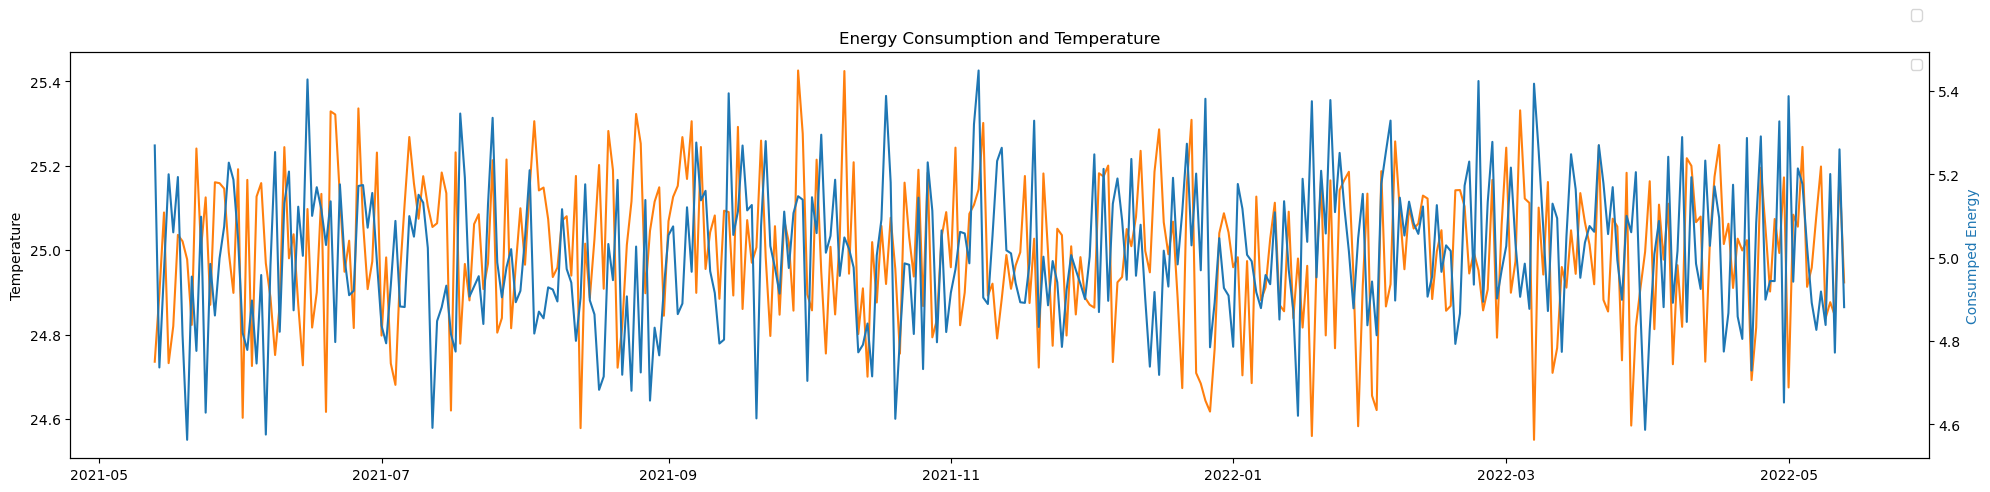

In [141]:
# Visualsation de la consommation journaliére d'énergie en fonction de la température  
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(daily_mean.time, daily_mean.temperature, color = 'tab:orange')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(daily_mean.time, daily_mean.energy_Consumption, color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


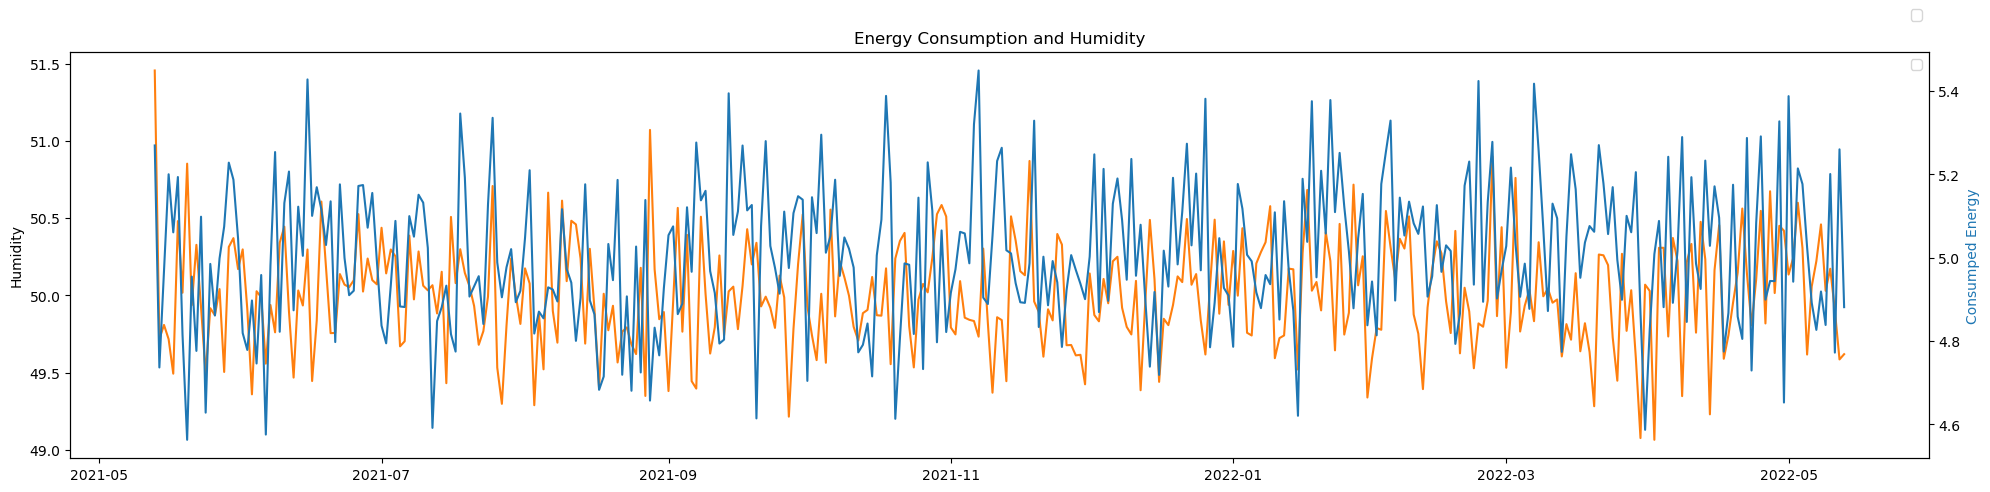

In [142]:
# Visualsation de la consommation journaliére d'énergie en fonction de l'humidité 
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(daily_mean.time, daily_mean.humidity, color = 'tab:orange')
ax1.set_ylabel('Humidity')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(daily_mean.time, daily_mean.energy_Consumption, color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


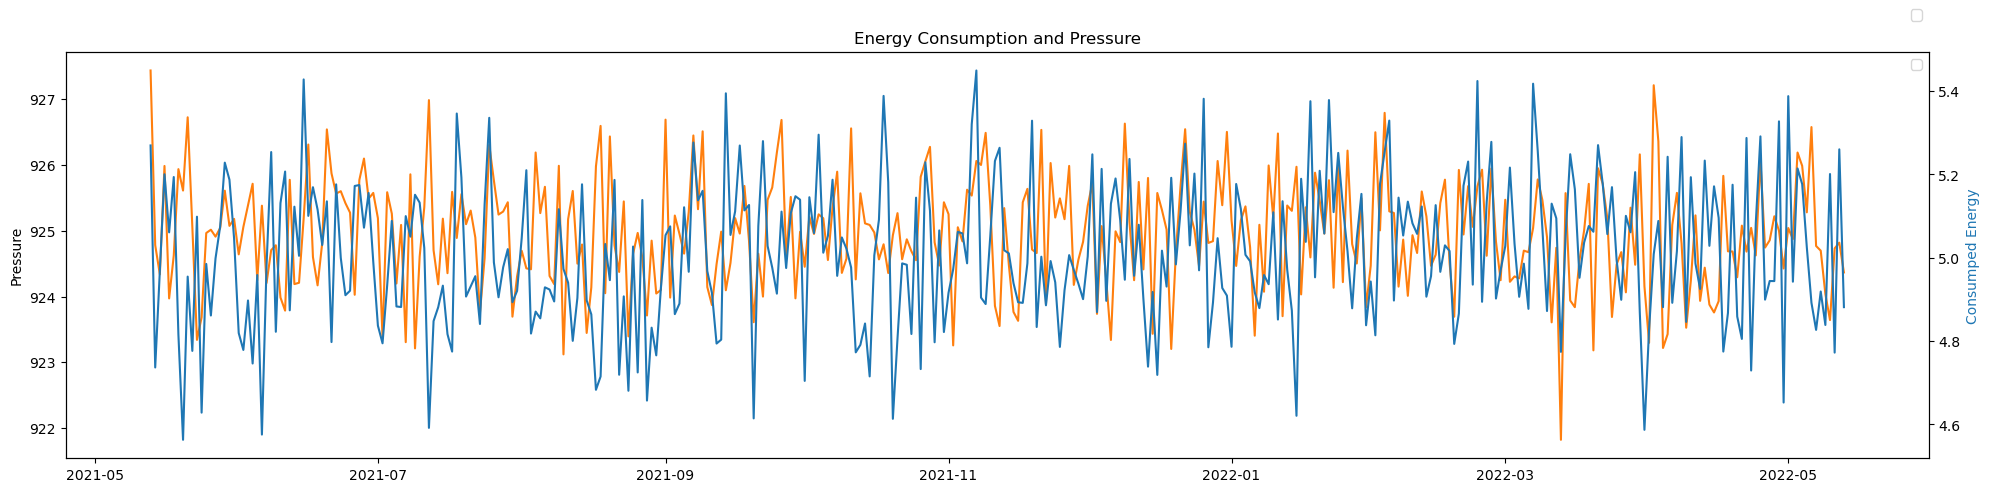

In [143]:
# Visualsation de la consommation journaliére d'énergie en fonction de la pression  
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(daily_mean.time, daily_mean.pressure, color = 'tab:orange')
ax1.set_ylabel('Pressure')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(daily_mean.time, daily_mean.energy_Consumption, color = 'tab:blue')
ax2.set_ylabel('Consumped Energy',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Pressure')
fig.tight_layout()
plt.show()

## Prédiction de la consommation d'énérgie en fonction des paramétres environnementaux

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ARDRegression, Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [145]:
days = daily_mean['time']

daily_mean['time'] = (daily_mean['time'] - daily_mean['time'].min())  / np.timedelta64(1,'D')

daily_mean

,time,temperature,humidity,pressure,voltage,current,energy_Consumption
0,0.0,24.735753,51.455336,927.437379,222.893766,3.518973,5.269565
1,1.0,24.896443,49.718882,924.782233,224.781988,3.004155,4.736738
2,2.0,25.089517,49.809206,924.338684,225.120687,2.983781,4.968471
3,3.0,24.732362,49.717119,925.986152,225.125406,2.925548,5.200396
4,4.0,24.820038,49.493967,923.972480,224.881406,2.904620,5.061018
...,...,...,...,...,...,...,...
361,361.0,24.839137,50.030247,924.039334,224.775540,2.900188,4.838727
362,362.0,24.876819,50.172736,923.643647,224.785073,2.926526,5.200995
363,363.0,24.844579,49.903197,924.733038,225.363442,3.072930,4.772396
364,364.0,25.186970,49.586141,924.820135,225.057158,3.026909,5.260224


In [146]:
# Diviser les données en entrée X (température, humidité et pression) et en sortie y (courant et tension)
X = daily_mean[['time', 'temperature', 'humidity', 'pressure']]
y = daily_mean[['energy_Consumption']]

train_ratio = int(len(X) * 0.8)

X_train = X[0:train_ratio]
X_test = X[train_ratio:len(X)]

y_train = y[0:train_ratio]
y_test = y[train_ratio:len(X)]

In [147]:
# Mise à l'échelle des données en utilisant la classe StandardScaler de scikit-learn.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
# Entraînement et l'évaluation de différents modèles de régression
regressors = []

regressors.append(('Linear Regressor', LinearRegression()))
regressors.append(('Ridge', Ridge()))
regressors.append(('Decision Tree', DecisionTreeRegressor()))
regressors.append(('Random Forest', RandomForestRegressor(n_estimators=100, n_jobs=-1)))
regressors.append(('ARD Regressor', ARDRegression()))

for name, model in regressors:
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    
    print(name)
    print("R2 Score: {}".format(r2_score(y_test, y_pred)))
    print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Linear Regressor
R2 Score: -0.006613494737762515
Root Mean Squared Error: 0.17792557508887533
Ridge
R2 Score: -0.006418612559645487
Root Mean Squared Error: 0.17790835089993773
Decision Tree
R2 Score: -0.3817769855250479
Root Mean Squared Error: 0.20846155908965924
Random Forest
R2 Score: 0.022938604797084206
Root Mean Squared Error: 0.17529435516768432
ARD Regressor
R2 Score: -0.0109986021229187
Root Mean Squared Error: 0.17831270226463894


In [149]:
regressors = DecisionTreeRegressor()

regressors.fit(X_train, y_train.values.ravel())
y_pred = regressors.predict(X_test)

In [150]:
result = pd.DataFrame()
result['Prediction'] = y_pred
result['True'] = y_test.values.ravel()
result['Diff'] = y_test.values.ravel() - y_pred

result

,Prediction,True,Diff
0,5.123069,5.028063,-0.095006
1,4.969874,5.216438,0.246564
2,4.969874,5.033622,0.063748
3,5.176995,4.906357,-0.270638
4,4.906678,4.985876,0.079198
...,...,...,...
69,4.969874,4.838727,-0.131148
70,4.793300,5.200995,0.407695
71,4.902144,4.772396,-0.129748
72,5.122980,5.260224,0.137244


In [151]:
test_days = days[train_ratio:len(X)]

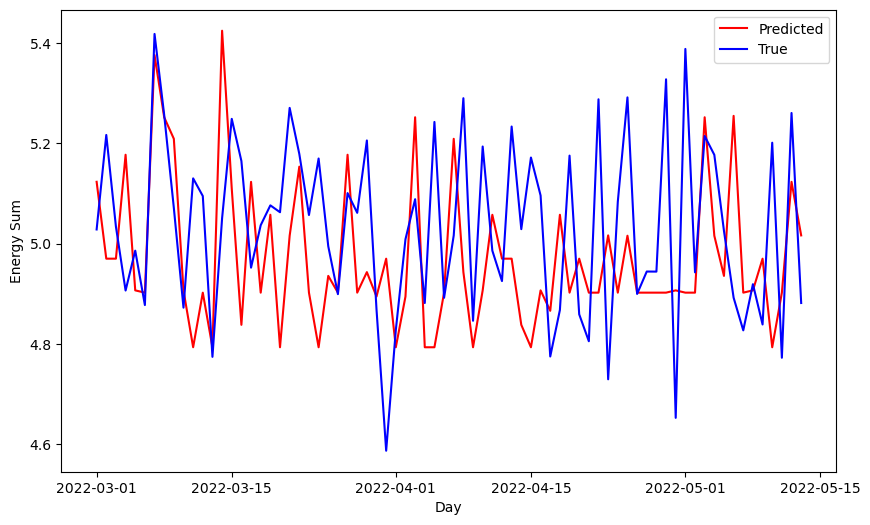

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(test_days, result['Prediction'], color='r', label='Predicted')
plt.plot(test_days, result['True'], color='b', label='True')
plt.xlabel('Day')
plt.ylabel('Energy Sum')
plt.legend(loc='upper right')
plt.show()